In [1]:
from simpletransformers.classification import ClassificationModel
import pandas as pd
import logging
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


d:\SEM_2_SETU\ml\ML_Algorithms_shon\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

df = pd.read_csv("sentiment_analysis.csv")

In [3]:
# Drop unnecessary columns
df.drop(columns=['Year', 'Month', 'Day', 'Time of Tweet', 'Platform'], inplace=True)


In [4]:
df = df.dropna()

In [5]:
df['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [6]:
df = df[df['sentiment'] != 'neutral']



In [7]:
# Rename the columns to match expected names
df = df.rename(columns={"text": "text", "sentiment": "labels"})

In [8]:

# Initialize LabelEncoder and encode the sentiments
label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['labels'])

In [9]:
df['labels'].unique()

array([1, 0])

In [10]:

# Split the data into training and testing sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [11]:

model = ClassificationModel(
    'distilbert', 'distilbert-base-uncased', 
    use_cuda=False,
    args={'reprocess_input_data': True, 'overwrite_output_dir': True}
)
model.train_model(train_df)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
1it [00:19, 19.25s/it]
Epoch 1 of 1: 100%|██████████| 1/1 [00:44<00:00, 44.04s/it]


(30, 0.6058876365423203)

In [12]:
#model = ClassificationModel('roberta', 'roberta-base', use_cuda=False, args={'reprocess_input_data': True, 'overwrite_output_dir': True})

# Train the model
#model.train_model(train_df)

In [13]:
test_df 

,text,labels
351,Sorry RB is on PS3 for me,0
454,Still jealous,0
273,Went to a party last night. Dindin and I showe...,1
13,i want to go to music tonight but i lost my vo...,0
406,Have a good one,1
390,sorry friends - I`m swamped with deadlines r...,0
342,Ok so I`ve now got a bit of a bad back after l...,0
187,I am tres depressed,0
6,2 am feedings for the baby are fun when he is ...,1
309,"I know It was worth a shot, though!",1


In [17]:
# Make predictions on the test set (pass the 'text' column as a list of strings)
predictions, raw_outputs = model.predict(test_df['text'].tolist())

# Print the predictions (you can modify this as needed)
print(predictions)



1it [00:18, 18.94s/it]
100%|██████████| 1/1 [00:02<00:00,  2.65s/it]

[1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1]


C:\Users\Asus\AppData\Local\Temp\ipykernel_22220\3436664969.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='labels', data=test_df, palette="viridis")
C:\Users\Asus\AppData\Local\Temp\ipykernel_22220\3436664969.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predictions', data=test_df, palette="viridis")


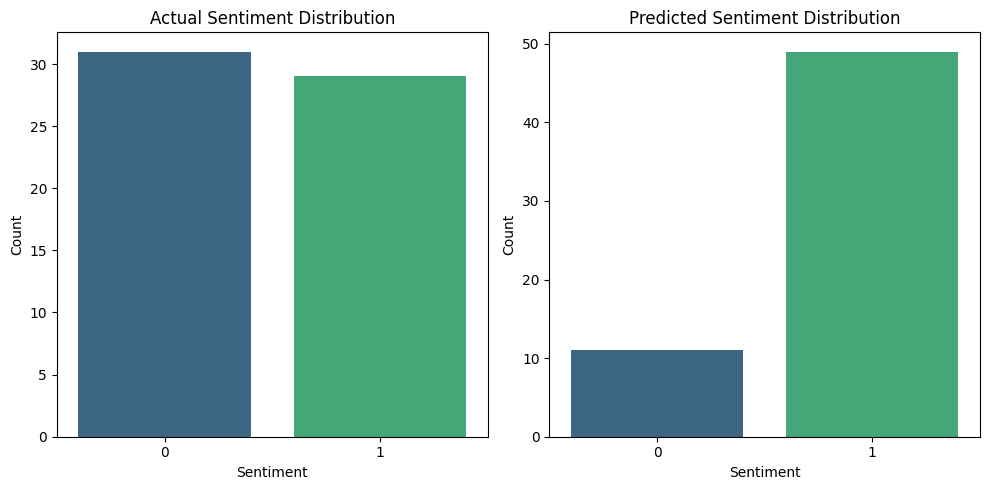

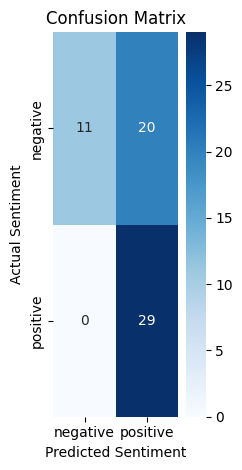

In [18]:

# Ensure the predictions and actual labels are in the DataFrame
test_df['predictions'] = predictions

# Plot the distribution of actual and predicted sentiments
plt.figure(figsize=(10, 5))

# Plot actual sentiment distribution
plt.subplot(1, 2, 1)
sns.countplot(x='labels', data=test_df, palette="viridis")
plt.title("Actual Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Plot predicted sentiment distribution
plt.subplot(1, 2, 2)
sns.countplot(x='predictions', data=test_df, palette="viridis")
plt.title("Predicted Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


cm = confusion_matrix(test_df['labels'], test_df['predictions'])


# Plot Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")

plt.tight_layout()
plt.show()
